<a href="https://colab.research.google.com/github/EmilyJarecki/ElmhurstUni/blob/main/Project_HR_IBM_Attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 1.8 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 93.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 108.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3

In [1]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn import set_config

#PyCaret
from pycaret.classification import *

%matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()

Saving IBM HR Employe Attrition Sample Data.xlsx to IBM HR Employe Attrition Sample Data.xlsx


### 1. Import Dataset

In [3]:
import io
data = pd.read_excel(io.BytesIO(uploaded[
    'IBM HR Employe Attrition Sample Data.xlsx']),header=0)

data = pd.read_excel('IBM HR Employe Attrition Sample Data.xlsx')

data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### 2. Set up the Pycaret environment

In [4]:
# remove unnecessary columns

data = data.drop(columns=['EmployeeNumber', 'EmployeeCount',
                          'Over18', 'StandardHours', 'DailyRate',
                          'HourlyRate', 'MonthlyRate'])


clf1 = setup(data, target = 'Attrition', session_id=786)


# setup() handles encoding
# A lot of data cleaning is done here
# splits into 80/20


,Description,Value
0,Session id,786
1,Target,Attrition
2,Target type,Binary
3,Target mapping,"No: 0, Yes: 1"
4,Original data shape,"(1470, 28)"
5,Transformed data shape,"(1470, 47)"
6,Transformed train set shape,"(1029, 47)"
7,Transformed test set shape,"(441, 47)"
8,Numeric features,20
9,Categorical features,7


#### Data Exploration

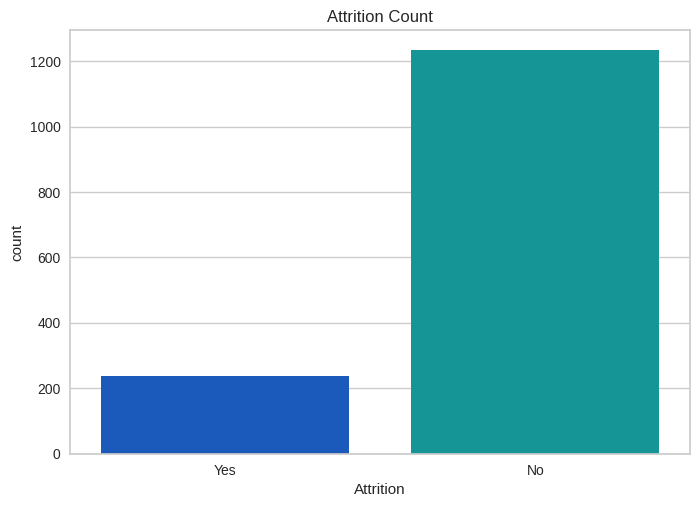

,proportion
Attrition,
No,83.877551
Yes,16.122449


In [5]:
#1 Attrition Count
sns.countplot(data, x='Attrition', palette='winter')
plt.title('Attrition Count')
plt.show()

data['Attrition'].value_counts(normalize=True) * 100


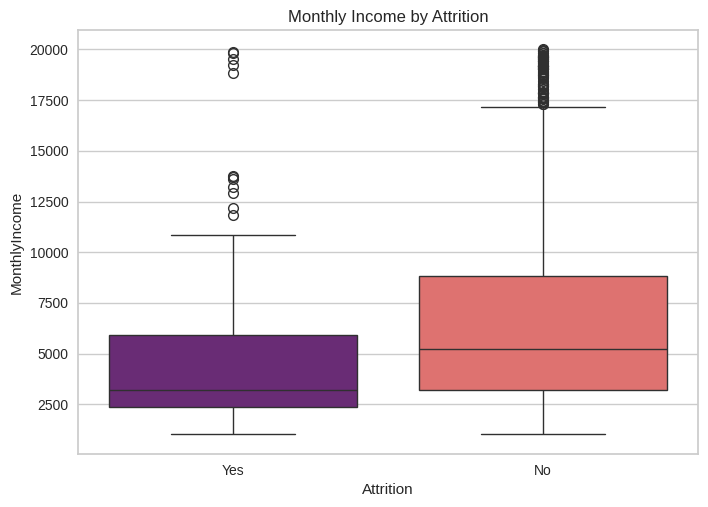

In [6]:
# 2 Monthly Income by Attrition
sns.boxplot(data, x='Attrition', y='MonthlyIncome', palette='magma')
plt.title('Monthly Income by Attrition')
plt.show()

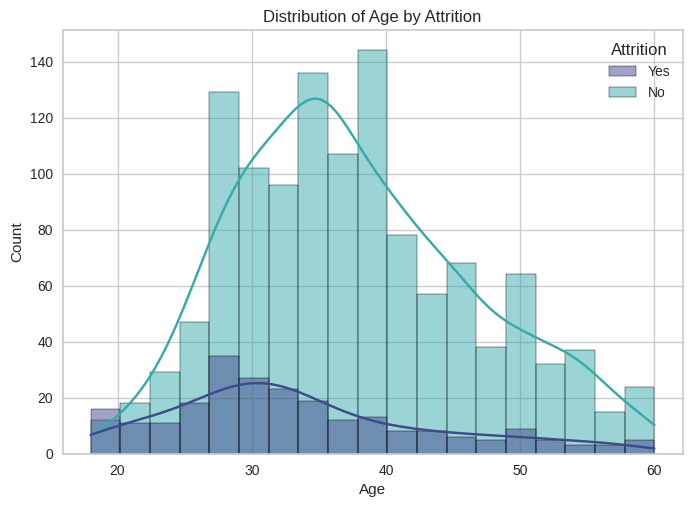

In [7]:
#3 Distribution of Age by Attrition
sns.histplot(data, x='Age', hue='Attrition', kde=True, palette='mako')
plt.title('Distribution of Age by Attrition')
plt.show()

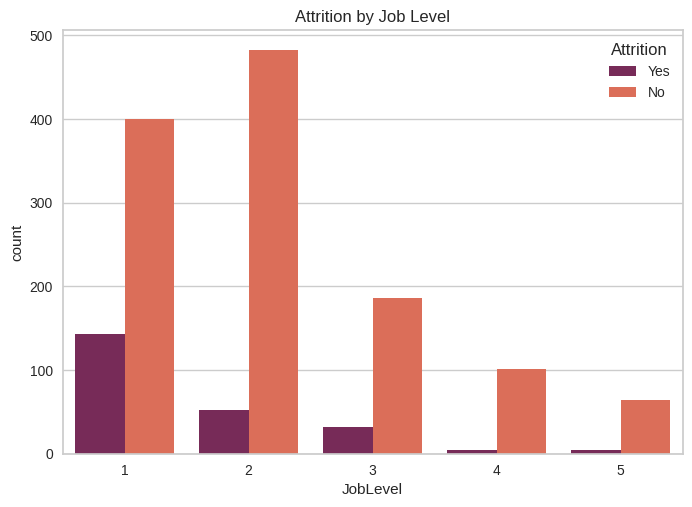

   JobLevel Attrition  Count  Percentage
0         1        No    400   73.664825
1         1       Yes    143   26.335175
2         2        No    482   90.262172
3         2       Yes     52    9.737828
4         3        No    186   85.321101
5         3       Yes     32   14.678899
6         4        No    101   95.283019
7         4       Yes      5    4.716981
8         5        No     64   92.753623
9         5       Yes      5    7.246377


In [8]:
#4 Job Level vs. Attrition
sns.countplot(data, x='JobLevel', hue='Attrition', palette='rocket')
plt.title('Attrition by Job Level')
plt.show()

# Group by JobLevel and Attrition and count
counts = data.groupby(['JobLevel', 'Attrition']).size().reset_index(name='Count')

# Calculate percentage within each JobLevel
# Instead of direct assignment, use transform to align indices
counts['Percentage'] = counts.groupby('JobLevel')['Count'].transform(lambda x: x / x.sum() * 100)
print(counts)

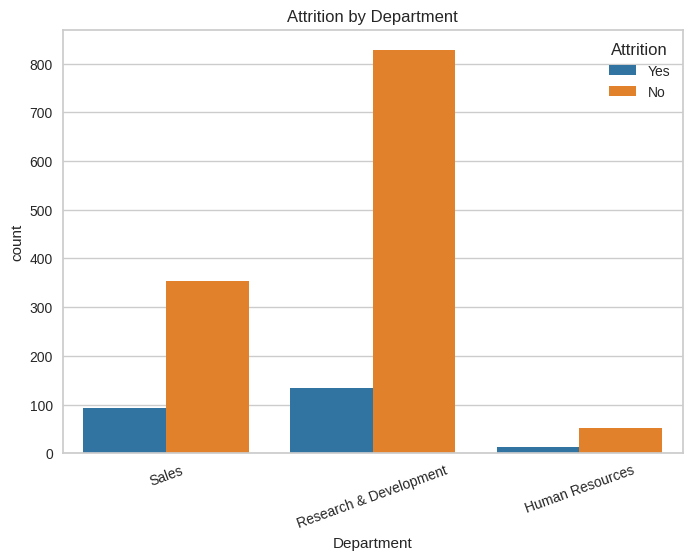


------------WHOLE NUMBERS-----------
Attrition                No  Yes
Department                      
Human Resources          51   12
Research & Development  828  133
Sales                   354   92


-------------PERCENTAGE-------------
Attrition                  No    Yes
Department                          
Human Resources         80.95  19.05
Research & Development  86.16  13.84
Sales                   79.37  20.63


In [9]:
#5 Department vs Attrition
sns.countplot(data, x='Department', hue='Attrition', palette='tab10')
plt.title('Attrition by Department')
plt.xticks(rotation=20)
plt.show()

dept_attrition_matrix = pd.crosstab(data['Department'], data['Attrition'])

print()
print("------------WHOLE NUMBERS-----------")
print(dept_attrition_matrix)
print()
print()

print("-------------PERCENTAGE-------------")
dept_attrition_pct = pd.crosstab(data['Department'], data['Attrition'], normalize='index') * 100

print(dept_attrition_pct.round(2))

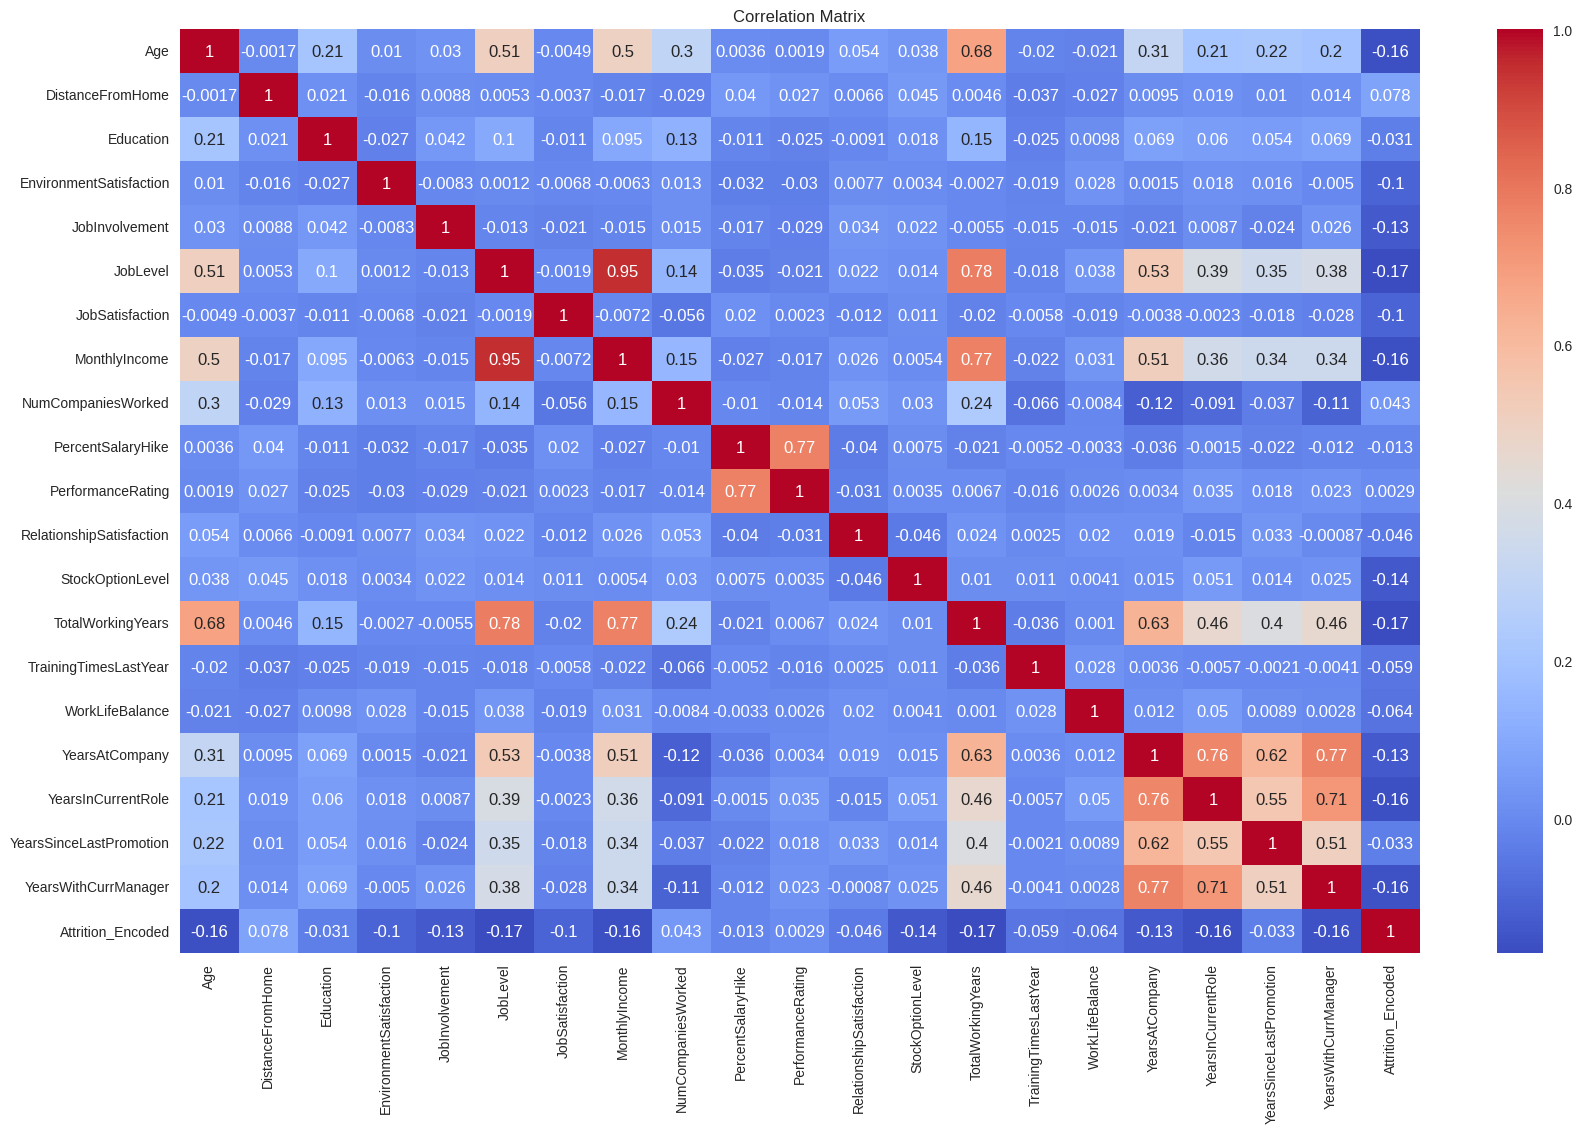

In [10]:
# Encode target variable if necessary
data['Attrition_Encoded'] = data['Attrition'].map({'Yes': 1, 'No': 0})

# Heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


### 3. Compare Baseline

In [11]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8766,0.8217,0.8766,0.8670,0.8615,0.4450,0.4749,1.0980
lda,Linear Discriminant Analysis,0.8746,0.8208,0.8746,0.8617,0.8596,0.4380,0.4623,0.1350
gbc,Gradient Boosting Classifier,0.8688,0.7932,0.8688,0.8555,0.8455,0.3678,0.4134,0.4630
ada,Ada Boost Classifier,0.8650,0.8067,0.8650,0.8561,0.8494,0.4006,0.4294,0.2600
ridge,Ridge Classifier,0.8630,0.8209,0.8630,0.8589,0.8218,0.2497,0.3409,0.1260
lightgbm,Light Gradient Boosting Machine,0.8562,0.8111,0.8562,0.8341,0.8306,0.3069,0.3435,0.3240
rf,Random Forest Classifier,0.8533,0.7996,0.8533,0.8361,0.7996,0.1505,0.2424,0.3390
et,Extra Trees Classifier,0.8523,0.7850,0.8523,0.8371,0.8048,0.1759,0.2626,0.3050
xgboost,Extreme Gradient Boosting,0.8494,0.7910,0.8494,0.8234,0.8261,0.2950,0.3196,0.4070
svm,SVM - Linear Kernel,0.8387,0.6489,0.8387,0.7034,0.7651,0.0000,0.0000,0.1730


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=786, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### 4. Create Model

In [12]:
lr_model = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8252,0.8068,0.8252,0.7978,0.8080,0.2137,0.2215
1,0.8932,0.8499,0.8932,0.8842,0.8848,0.5336,0.5460
2,0.8932,0.8369,0.8932,0.8898,0.8749,0.4718,0.5232
3,0.8835,0.8112,0.8835,0.8733,0.8730,0.5076,0.5237
4,0.9029,0.7736,0.9029,0.9017,0.8901,0.5658,0.6033
5,0.8932,0.8509,0.8932,0.9053,0.8709,0.4767,0.5594
6,0.8641,0.7969,0.8641,0.8485,0.8395,0.3545,0.3995
7,0.8641,0.7278,0.8641,0.8473,0.8462,0.3921,0.4181
8,0.8544,0.8276,0.8544,0.8395,0.8439,0.4009,0.4092


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

### 5. Tune Model

In [13]:
tuned_lr = tune_model(lr_model, n_iter=50, optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8447,0.8161,0.8447,0.8224,0.8293,0.3011,0.3120
1,0.8835,0.8513,0.8835,0.8723,0.8666,0.4422,0.4764
2,0.8932,0.8362,0.8932,0.8898,0.8749,0.4718,0.5232
3,0.8932,0.8112,0.8932,0.8862,0.8814,0.5358,0.5609
4,0.9029,0.7661,0.9029,0.9017,0.8901,0.5658,0.6033
5,0.9029,0.8570,0.9029,0.9130,0.8854,0.5389,0.6073
6,0.8544,0.8016,0.8544,0.8326,0.8318,0.3291,0.3595
7,0.8544,0.7367,0.8544,0.8326,0.8318,0.3291,0.3595
8,0.8447,0.8406,0.8447,0.8311,0.8361,0.3776,0.3823


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 50 candidates, totalling 500 fits


In [14]:
print("Logistic Regresison model:")
print(lr_model)
print()
print()
print("Tuned Logistic Regression Model: ")
print(tuned_lr)

Logistic Regresison model:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=786, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Tuned Logistic Regression Model: 
LogisticRegression(C=8.571, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=786, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


### 6. Ensemble Model
Ensembling is the process of combining predictions from multiple machine learning models to create a stronger, more robust model.

Think of it like this: instead of relying on one "expert" (a single model), you ask several experts and average or vote on their answers. This tends to improve accuracy and reduce overfitting.

The ensemble model types are:
* Bagging
<br>
* Boosting
<br>
* Blending/Stacking

In [15]:
bagged_lr = ensemble_model(tuned_lr, n_estimators=50)

print(bagged_lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8350,0.8125,0.8350,0.8059,0.8150,0.2344,0.2470
1,0.8835,0.8398,0.8835,0.8717,0.8720,0.4758,0.4931
2,0.8932,0.8283,0.8932,0.8898,0.8749,0.4718,0.5232
3,0.8835,0.8167,0.8835,0.8733,0.8730,0.5076,0.5237
4,0.9029,0.7934,0.9029,0.9017,0.8901,0.5658,0.6033
5,0.9223,0.8543,0.9223,0.9289,0.9121,0.6526,0.6960
6,0.8641,0.7900,0.8641,0.8485,0.8395,0.3545,0.3995
7,0.8544,0.7189,0.8544,0.8326,0.8318,0.3291,0.3595
8,0.8641,0.8352,0.8641,0.8492,0.8518,0.4255,0.4390


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

BaggingClassifier(bootstrap=True, bootstrap_features=False,
                  estimator=LogisticRegression(C=8.571, class_weight={},
                                               dual=False, fit_intercept=True,
                                               intercept_scaling=1,
                                               l1_ratio=None, max_iter=1000,
                                               multi_class='auto', n_jobs=None,
                                               penalty='l2', random_state=786,
                                               solver='lbfgs', tol=0.0001,
                                               verbose=0, warm_start=False),
                  max_features=1.0, max_samples=1.0, n_estimators=50,
                  n_jobs=None, oob_score=False, random_state=786, verbose=0,
                  warm_start=False)


In [16]:
boosted_lr = ensemble_model(tuned_lr, method = 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8350,0.8197,0.8350,0.8225,0.8278,0.3189,0.3213
1,0.9029,0.8484,0.9029,0.8963,0.8933,0.5632,0.5836
2,0.8738,0.8240,0.8738,0.8655,0.8445,0.3315,0.4020
3,0.8738,0.8187,0.8738,0.8607,0.8599,0.4515,0.4725
4,0.8835,0.8044,0.8835,0.8745,0.8682,0.4789,0.5107
5,0.8835,0.8372,0.8835,0.8978,0.8555,0.4103,0.5080
6,0.8738,0.7681,0.8738,0.8904,0.8392,0.3394,0.4521
7,0.8544,0.7196,0.8544,0.8352,0.8383,0.3671,0.3842
8,0.8835,0.8311,0.8835,0.8733,0.8730,0.5076,0.5237


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

### 7. Blend Models
To get maximum value out of blending, we want to mix diverse models.
<br>
Random Forest and Gradient Boosting will capture complex interactions, while Logistic Regression will focus on linear relationships. K-Nearest Neighbors will help make predictions based on proximity to other data points.

In [17]:
rf_model = create_model('rf')
xgb_model = create_model('xgboost')
knn_model = create_model('knn')

blended = blend_models(estimator_list = [tuned_lr, rf_model, xgb_model, knn_model])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8447,0.7687,0.8447,0.7135,0.7735,0.0000,0.0000
1,0.8641,0.8229,0.8641,0.8829,0.8163,0.1944,0.3281
2,0.8641,0.8344,0.8641,0.8829,0.8163,0.1944,0.3281
3,0.8738,0.8105,0.8738,0.8904,0.8392,0.3394,0.4521
4,0.8641,0.7992,0.8641,0.8831,0.8216,0.2635,0.3896
5,0.8350,0.7931,0.8350,0.7852,0.7764,0.0731,0.1270
6,0.8641,0.8331,0.8641,0.8831,0.8216,0.2635,0.3896
7,0.8252,0.6389,0.8252,0.6958,0.7550,-0.0187,-0.0440
8,0.8447,0.8078,0.8447,0.8690,0.7822,0.0945,0.2227


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8155,0.7148,0.8155,0.7796,0.7933,0.1443,0.1520
1,0.8738,0.8010,0.8738,0.8588,0.8522,0.3758,0.4167
2,0.8544,0.8506,0.8544,0.8321,0.8368,0.3244,0.3419
3,0.8641,0.8119,0.8641,0.8473,0.8462,0.3921,0.4181
4,0.8641,0.8140,0.8641,0.8485,0.8395,0.3545,0.3995
5,0.8252,0.7469,0.8252,0.8011,0.8095,0.2614,0.2697
6,0.8544,0.8208,0.8544,0.8326,0.8318,0.3291,0.3595
7,0.8252,0.7100,0.8252,0.7564,0.7707,0.0531,0.0785
8,0.8544,0.8345,0.8544,0.8352,0.8383,0.3671,0.3842


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8252,0.5794,0.8252,0.7555,0.7785,0.0404,0.0525
1,0.8350,0.6519,0.8350,0.7697,0.7842,0.0591,0.0851
2,0.8058,0.5945,0.8058,0.7590,0.7777,0.0704,0.0758
3,0.7961,0.6816,0.7961,0.7444,0.7645,0.0608,0.0664
4,0.8350,0.6033,0.8350,0.7970,0.8004,0.1912,0.2244
5,0.8058,0.5085,0.8058,0.7516,0.7707,0.0779,0.0878
6,0.8058,0.5722,0.8058,0.7316,0.7592,0.0172,0.0213
7,0.8058,0.4986,0.8058,0.7316,0.7592,0.0172,0.0213
8,0.8252,0.5267,0.8252,0.7732,0.7833,0.1155,0.1430


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8350,0.7529,0.8350,0.7697,0.7842,0.0591,0.0851
1,0.8835,0.8520,0.8835,0.8976,0.8523,0.3602,0.4687
2,0.8932,0.8103,0.8932,0.9052,0.8684,0.4343,0.5267
3,0.8641,0.8105,0.8641,0.8562,0.8314,0.3120,0.3863
4,0.8641,0.8331,0.8641,0.8831,0.8216,0.2635,0.3896
5,0.8544,0.7962,0.8544,0.8760,0.8027,0.1821,0.3165
6,0.8641,0.8201,0.8641,0.8831,0.8216,0.2635,0.3896
7,0.8447,0.6813,0.8447,0.8690,0.7822,0.0945,0.2227
8,0.8738,0.8358,0.8738,0.8692,0.8474,0.3815,0.4477


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

### 8. Analyze Model

In [27]:
data.corr(numeric_only=True)['MonthlyIncome'].sort_values(ascending=False)


,MonthlyIncome
MonthlyIncome,1.000000
JobLevel,0.950300
TotalWorkingYears,0.772893
YearsAtCompany,0.514285
Age,0.497855
YearsInCurrentRole,0.363818
YearsSinceLastPromotion,0.344978
YearsWithCurrManager,0.344079
NumCompaniesWorked,0.149515
Education,0.094961


In [29]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

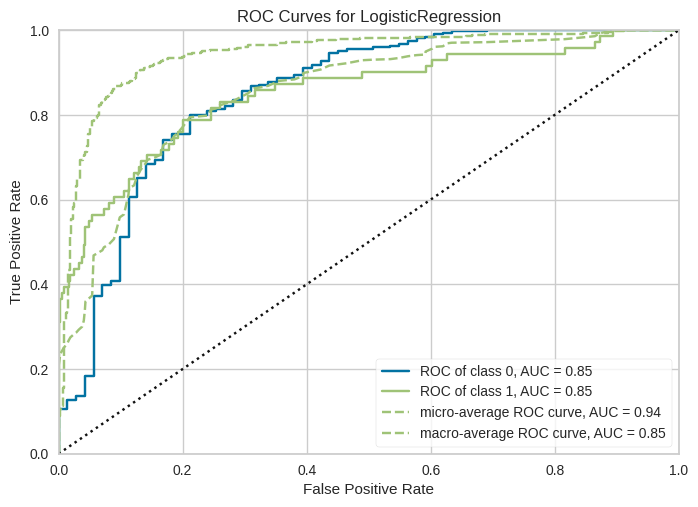

In [19]:
plot_model(tuned_lr, plot = 'auc')

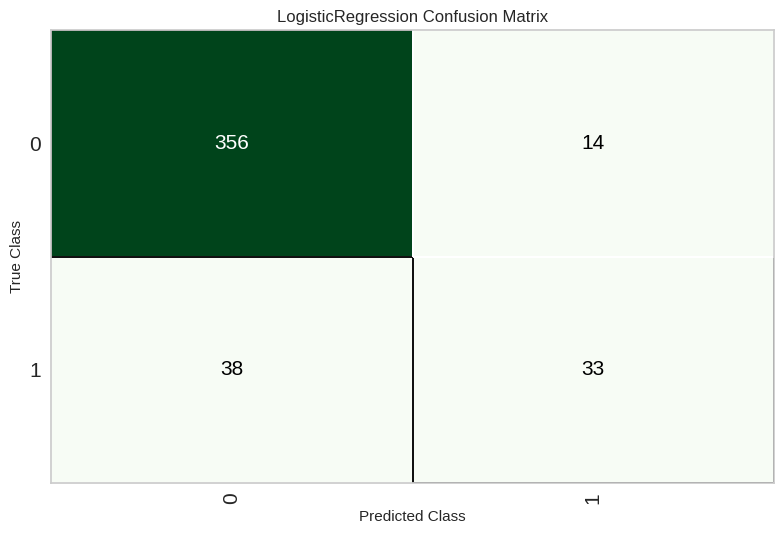

In [20]:
plot_model(tuned_lr, plot = 'confusion_matrix')

### 9. Interpret Model

My notes: XGBoost has built-in SHAP. This plot uses SHAP values to analyze the relationships between features and the target variable.

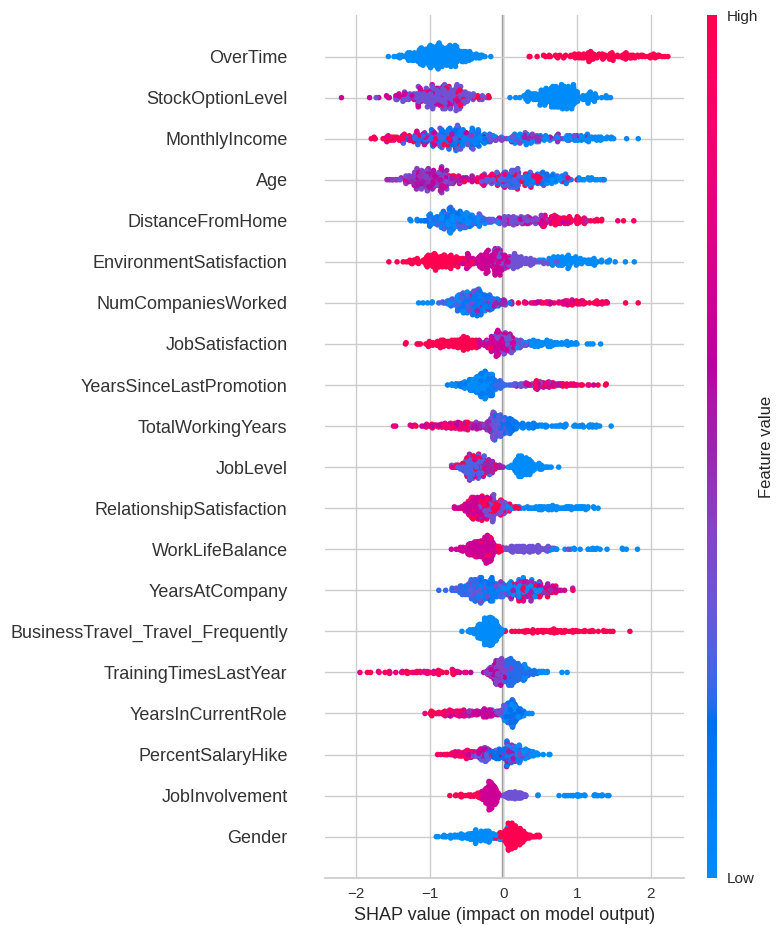

In [ ]:
interpret_model(xgb_model)



# the interpret_model function only supports tree based models
# IT HANDLES MULTICOLLINEARITY BETTER

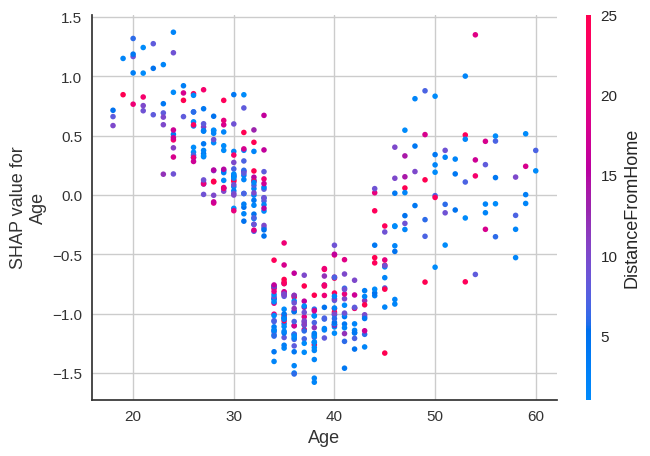

In [ ]:
interpret_model(xgb_model, plot = 'correlation')

In [ ]:
interpret_model(xgb_model, plot = 'reason', observation=1)

### 10. Predict Model

This is finally testing the predictive model created on the testing data.

In [ ]:
pred_holdouts = predict_model(tuned_lr)
pred_holdouts.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8821,0.8512,0.8821,0.8711,0.8719,0.4945,0.5085


,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,prediction_label,prediction_score
16,32,Travel_Rarely,Research & Development,5,2,Life Sciences,1,Male,4,1,...,7,5,2,6,2,0,5,No,No,0.9299
522,37,Travel_Rarely,Research & Development,10,2,Life Sciences,4,Male,4,1,...,4,2,3,1,0,0,0,No,No,0.9527
680,36,Travel_Rarely,Research & Development,7,4,Other,2,Male,3,1,...,8,6,3,6,2,0,1,No,No,0.9574
366,41,Travel_Frequently,Sales,4,3,Marketing,1,Male,3,2,...,8,5,3,8,7,7,7,Yes,No,0.7514
393,34,Non-Travel,Sales,4,4,Marketing,3,Female,3,2,...,6,3,3,3,2,1,2,No,No,0.9210
